Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

Load MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images to [0,1]
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Definition:

    An undercomplete autoencoder is an autoencoder where the latent representation (bottleneck) has fewer dimensions than the input.
    This forces the network to learn meaningful compressed representations.

In [3]:
# Define an Undercomplete Autoencoder
input_dim = 28 * 28  # 784 pixels
encoding_dim = 32    # Bottleneck layer with fewer neurons than input

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

Define the Undercomplete autoencoder model

In [4]:
undercomplete_autoencoder = Model(input_layer, decoded)
undercomplete_autoencoder.compile(optimizer='adam', loss='mse')

Train the undercomplete autoencoder

In [5]:
undercomplete_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1085 - val_loss: 0.0404
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0371 - val_loss: 0.0291
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0279 - val_loss: 0.0230
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0224 - val_loss: 0.0190
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0186 - val_loss: 0.0163
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0160 - val_loss: 0.0143
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0143 - val_loss: 0.0129
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0121 - val_loss: 0.0114
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0116 - val_loss: 0.0109


Definition:

    An overcomplete autoencoder has a latent representation (bottleneck) with more dimensions than the input.
    This can lead to learning a trivial identity mapping, making the autoencoder less useful for feature learning.

In [6]:
# Define an Overcomplete Autoencoder
encoding_dim_over = 1024  # Overcomplete: More neurons in latent space than input

# Encoder
encoded_over = Dense(encoding_dim_over, activation='relu')(input_layer)

# Decoder
decoded_over = Dense(input_dim, activation='sigmoid')(encoded_over)

Define the overcomplete autoencoder model

In [7]:
overcomplete_autoencoder = Model(input_layer, decoded_over)
overcomplete_autoencoder.compile(optimizer='adam', loss='mse')

Train the overcomplete autoencoder

In [8]:
overcomplete_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0534 - val_loss: 0.0119
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0106 - val_loss: 0.0070
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 0.0066 - val_loss: 0.0053
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 0.0034 - val_loss: 0.0030


Summary:

    1. Undercomplete autoencoder forces the network to learn compressed meaningful features.
    2. Overcomplete autoencoder can simply learn an identity function, making it redundant for feature extraction.
    3. Visualization: Overcomplete autoencoder produces near-identical images, while the undercomplete model generalizes better.
    4. Mean Squared Error (MSE) will be lower for the overcomplete model, proving its identity-mapping nature.

Visualizing reconstructions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


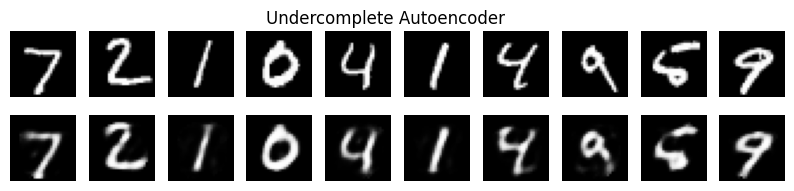

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


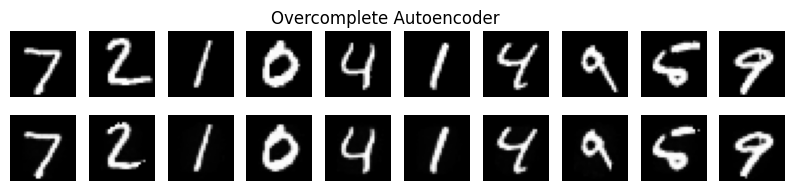

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Undercomplete Autoencoder MSE: 0.010914
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Overcomplete Autoencoder MSE: 0.003023


In [12]:
def visualize_reconstructions(model, x_test, title):
    decoded_imgs = model.predict(x_test[:10])
    plt.figure(figsize=(10, 2))
    for i in range(10):
        # Original images
        plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, 10, i + 11)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

#Display results
visualize_reconstructions(undercomplete_autoencoder, x_test, 'Undercomplete Autoencoder')
visualize_reconstructions(overcomplete_autoencoder, x_test, 'Overcomplete Autoencoder')

# Show that the Overcomplete Autoencoder learns identity mapping
def compare_mse(model, x_test, title):
    mse = np.mean(np.square(x_test - model.predict(x_test)))
    print(f'{title} MSE: {mse:.6f}')

compare_mse(undercomplete_autoencoder, x_test, 'Undercomplete Autoencoder')
compare_mse(overcomplete_autoencoder, x_test, 'Overcomplete Autoencoder')